In [1]:
import numpy as np
#from lhereader import LHEReader

from LHCO_reader import LHCO_reader

import math
import os

# Plotting library
import matplotlib.pyplot as plt

# tells matplotlib to embed plots within the notebook
%matplotlib inline

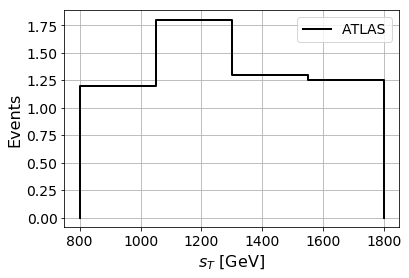

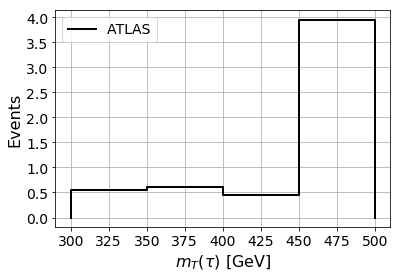

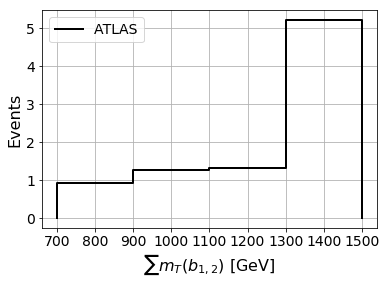

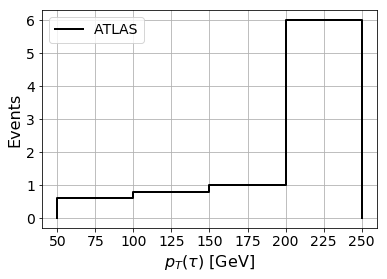

In [2]:
import matplotlib.pyplot as plt

ATLAS_sT = [0,1.2,1.2,1.8,1.8,1.3,1.3,1.25,1.25,0]
ATLAS_mTtau = [0,0.55,0.55,0.6,0.6,0.45,0.45,3.95,3.95,0]
ATLAS_mTbb = [0,0.9,0.9,1.25,1.25,1.3,1.3,5.2,5.2,0]
ATLAS_pT = [0,0.6,0.6,0.8,0.8,1,1,6,6,0]

plt.plot([800, 800, 1050, 1050, 1300, 1300, 1550, 1550, 1800, 1800], ATLAS_sT, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$s_T$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



plt.plot([300, 300, 350, 350, 400, 400, 450, 450, 500, 500], ATLAS_mTtau, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$m_T(\tau)$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  


plt.plot([700, 700, 900, 900, 1100, 1100, 1300, 1300, 1500, 1500], ATLAS_mTbb, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$\sum m_T(b_{1,2})$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show() 


plt.plot([50, 50, 100, 100, 150,150, 200, 200, 250, 250], ATLAS_pT, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T(\tau)$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show() 

## SIGNAL LQ up

#### LQ-up-800GeV

In [4]:
Folder = '/media/andres/Elements/Leptoquarks/signals/LQup-800GeV/'

LQup_800GeV_cross = 0.0151353
LQup_800GeV_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQup_800GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+'LQ_U_800-'+str(iev)+"/tag_1_delphes_events.lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQup_800GeV_evs = len(ev)
print('# events that pass the cuts: ', LQup_800GeV_evs)

/home/andres/anaconda3/envs/py2/lib/python2.7/site-packages/LHCO_reader/LHCO_reader.py:359: UserWarning: Couldn't read total number of events from LHCO
  warnings.warn("Couldn't read total number of events from LHCO")


('# events that pass the cuts: ', 60987)


In [5]:
cross = LQup_800GeV_cross*1000
aceptancia = LQup_800GeV_evs/(50000.*LQup_800GeV_runs)
luminosidad = 139

LQup_800GeV_fidcross = cross * aceptancia
LQup_800GeV_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', LQup_800GeV_fidcross)
print('S_expected: ', LQup_800GeV_Sexpected)

('fiducial cross section: ', 0.7384452328800001)
('S_expected: ', 102.64388737032002)


In [6]:
Folder = '/media/andres/Elements/Leptoquarks/signals/LQup-800GeV/'

LQup_800GeV_cross = 0.0151353
LQup_800GeV_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQup_800GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+'LQ_U_800-'+str(iev)+"/tag_1_delphes_events.lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQup_800GeV_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', LQup_800GeV_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 29202)


In [9]:
cross = LQup_800GeV_cross*1000
aceptancia = LQup_800GeV_evs_ATLAS/(50000.*LQup_800GeV_runs)
luminosidad = 139

LQup_800GeV_fidcross_ATLAS = cross * aceptancia
LQup_800GeV_Sexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', LQup_800GeV_fidcross_ATLAS)
print('S_expected: ', LQup_800GeV_Sexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.35358482448)
('S_expected: ', 49.14829060272)


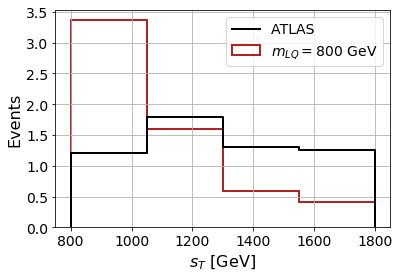

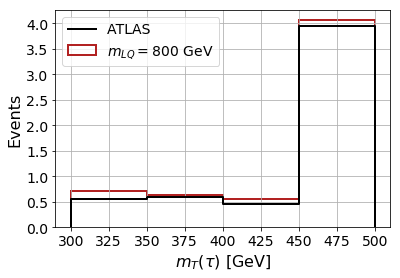

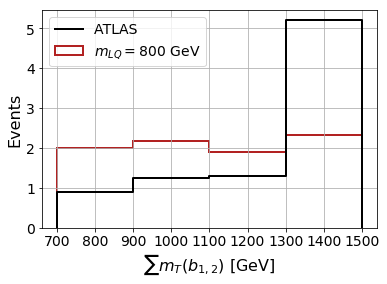

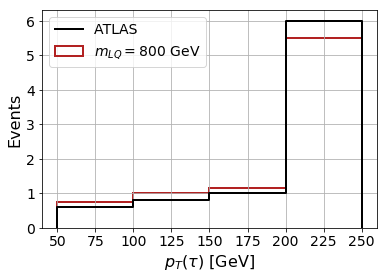

In [10]:
k_factor_800 = sum(ATLAS_pT)/2 / LQup_800GeV_Sexpected_ATLAS
factor_weight_800 = (1./k_factor_800)*LQup_800GeV_evs_ATLAS/LQup_800GeV_Sexpected_ATLAS


BGttstau_store_sT_cap_800 = []
for i in range(len(BGttstau_store_sT)):
    if BGttstau_store_sT[i] > 1800:
        BGttstau_store_sT_cap_800.append( 1800 )
    else:
        BGttstau_store_sT_cap_800.append( BGttstau_store_sT[i] )
        
    
weights_sT_800 = np.ones_like(BGttstau_store_sT_cap_800)/factor_weight_800
        
plt.hist(BGttstau_store_sT_cap_800, weights=weights_sT_800, bins=[800, 1050, 1300, 1550, 1800], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=800$ GeV')
plt.plot([800, 800, 1050, 1050, 1300, 1300, 1550, 1550, 1800, 1800], ATLAS_sT, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$s_T$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_mTtau_cap_800 = []
for i in range(len(BGttstau_store_mTtau)):
    if BGttstau_store_mTtau[i] > 500:
        BGttstau_store_mTtau_cap_800.append( 500 )
    else:
        BGttstau_store_mTtau_cap_800.append( BGttstau_store_mTtau[i] )
        
    
weights_mTtau_800 = np.ones_like(BGttstau_store_mTtau_cap_800)/factor_weight_800
        
plt.hist(BGttstau_store_mTtau_cap_800, weights=weights_mTtau_800, bins=[300, 350, 400, 450, 500], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=800$ GeV')
plt.plot([300, 300, 350, 350, 400, 400, 450, 450, 500, 500], ATLAS_mTtau, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$m_T(\tau)$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_mTb1b2_cap_800 = []
for i in range(len(BGttstau_store_mTb1b2)):
    if BGttstau_store_mTb1b2[i] > 1500:
        BGttstau_store_mTb1b2_cap_800.append( 1500 )
    else:
        BGttstau_store_mTb1b2_cap_800.append( BGttstau_store_mTb1b2[i] )
        
    
weights_mTb1b2_800 = np.ones_like(BGttstau_store_mTb1b2_cap_800)/factor_weight_800
        
plt.hist(BGttstau_store_mTb1b2_cap_800, weights=weights_mTb1b2_800, bins=[700, 900, 1100, 1300, 1500], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=800$ GeV')
plt.plot([700, 700, 900, 900, 1100, 1100, 1300, 1300, 1500, 1500], ATLAS_mTbb, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$\sum m_T(b_{1,2})$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_pTtau_cap_800 = []
for i in range(len(BGttstau_store_pTtau)):
    if BGttstau_store_pTtau[i] > 250:
        BGttstau_store_pTtau_cap_800.append( 250 )
    else:
        BGttstau_store_pTtau_cap_800.append( BGttstau_store_pTtau[i] )
        
    
weights_pTtau_800 = np.ones_like(BGttstau_store_pTtau_cap_800)/factor_weight_800
        
plt.hist(BGttstau_store_pTtau_cap_800, weights=weights_pTtau_800, bins=[50, 100, 150, 200, 250], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=800$ GeV')
plt.plot([50, 50, 100, 100, 150,150, 200, 200, 250, 250], ATLAS_pT, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T(\tau)$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  

#### LQ-up-1000GeV

In [11]:
Folder = '/media/andres/Elements/Leptoquarks/signals/LQup-1000GeV/Auto_Results_LHCO/'

LQup_1000GeV_cross = 0.003513
LQup_1000GeV_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQup_1000GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQup_1000GeV_evs = len(ev)
print('# events that pass the cuts: ', LQup_1000GeV_evs)

('# events that pass the cuts: ', 67081)


In [12]:
cross = LQup_1000GeV_cross*1000
aceptancia = LQup_1000GeV_evs/(50000.*LQup_1000GeV_runs)
luminosidad = 139

LQup_1000GeV_fidcross = cross * aceptancia
LQup_1000GeV_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', LQup_1000GeV_fidcross)
print('S_expected: ', LQup_1000GeV_Sexpected)

('fiducial cross section: ', 0.1885244424)
('S_expected: ', 26.204897493599997)


In [13]:
Folder = '/media/andres/Elements/Leptoquarks/signals/LQup-1000GeV/Auto_Results_LHCO/'

LQup_1000GeV_cross = 0.003513
LQup_1000GeV_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQup_1000GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQup_1000GeV_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', LQup_1000GeV_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 39022)


In [14]:
cross = LQup_1000GeV_cross*1000
aceptancia = LQup_1000GeV_evs_ATLAS/(50000.*LQup_1000GeV_runs)
luminosidad = 139

LQup_1000GeV_fidcross_ATLAS = cross * aceptancia
LQup_1000GeV_Sexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', LQup_1000GeV_fidcross_ATLAS)
print('S_expected: ', LQup_1000GeV_Sexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.10966742880000001)
('S_expected: ', 15.243772603200002)


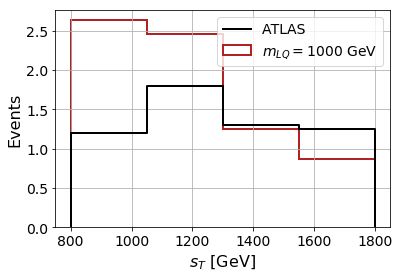

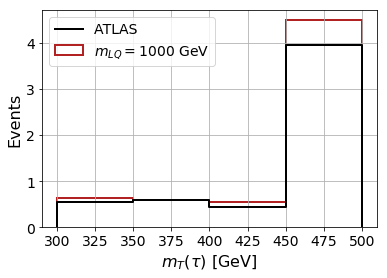

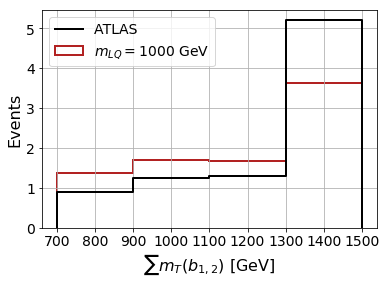

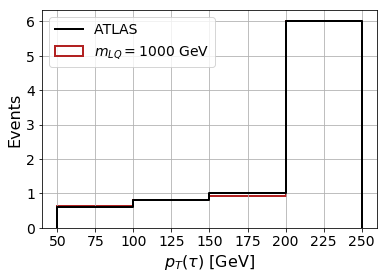

In [15]:
k_factor_1000 = sum(ATLAS_pT)/2 / LQup_1000GeV_Sexpected_ATLAS
factor_weight_1000 = (1./k_factor_1000)*LQup_1000GeV_evs_ATLAS/LQup_1000GeV_Sexpected_ATLAS


BGttstau_store_sT_cap_1000 = []
for i in range(len(BGttstau_store_sT)):
    if BGttstau_store_sT[i] > 1800:
        BGttstau_store_sT_cap_1000.append( 1800 )
    else:
        BGttstau_store_sT_cap_1000.append( BGttstau_store_sT[i] )
        
    
weights_sT_1000 = np.ones_like(BGttstau_store_sT_cap_1000)/factor_weight_1000
        
plt.hist(BGttstau_store_sT_cap_1000, weights=weights_sT_1000, bins=[800, 1050, 1300, 1550, 1800], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1000$ GeV')
plt.plot([800, 800, 1050, 1050, 1300, 1300, 1550, 1550, 1800, 1800], ATLAS_sT, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$s_T$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_mTtau_cap_1000 = []
for i in range(len(BGttstau_store_mTtau)):
    if BGttstau_store_mTtau[i] > 500:
        BGttstau_store_mTtau_cap_1000.append( 500 )
    else:
        BGttstau_store_mTtau_cap_1000.append( BGttstau_store_mTtau[i] )
        
    
weights_mTtau_1000 = np.ones_like(BGttstau_store_mTtau_cap_1000)/factor_weight_1000
        
plt.hist(BGttstau_store_mTtau_cap_1000, weights=weights_mTtau_1000, bins=[300, 350, 400, 450, 500], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1000$ GeV')
plt.plot([300, 300, 350, 350, 400, 400, 450, 450, 500, 500], ATLAS_mTtau, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$m_T(\tau)$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_mTb1b2_cap_1000 = []
for i in range(len(BGttstau_store_mTb1b2)):
    if BGttstau_store_mTb1b2[i] > 1500:
        BGttstau_store_mTb1b2_cap_1000.append( 1500 )
    else:
        BGttstau_store_mTb1b2_cap_1000.append( BGttstau_store_mTb1b2[i] )
        
    
weights_mTb1b2_1000 = np.ones_like(BGttstau_store_mTb1b2_cap_1000)/factor_weight_1000
        
plt.hist(BGttstau_store_mTb1b2_cap_1000, weights=weights_mTb1b2_1000, bins=[700, 900, 1100, 1300, 1500], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1000$ GeV')
plt.plot([700, 700, 900, 900, 1100, 1100, 1300, 1300, 1500, 1500], ATLAS_mTbb, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$\sum m_T(b_{1,2})$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_pTtau_cap_1000 = []
for i in range(len(BGttstau_store_pTtau)):
    if BGttstau_store_pTtau[i] > 250:
        BGttstau_store_pTtau_cap_1000.append( 250 )
    else:
        BGttstau_store_pTtau_cap_1000.append( BGttstau_store_pTtau[i] )
        
    
weights_pTtau_1000 = np.ones_like(BGttstau_store_pTtau_cap_1000)/factor_weight_1000
        
plt.hist(BGttstau_store_pTtau_cap_1000, weights=weights_pTtau_1000, bins=[50, 100, 150, 200, 250], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1000$ GeV')
plt.plot([50, 50, 100, 100, 150,150, 200, 200, 250, 250], ATLAS_pT, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T(\tau)$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  

#### LQ-up-1200GeV

In [16]:
Folder = '/media/andres/Elements/Leptoquarks/signals/LQup-1200GeV/Auto_Results_LHCO/'

LQup_1200GeV_cross = 0.000923
LQup_1200GeV_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQup_1200GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQup_1200GeV_evs = len(ev)
print('# events that pass the cuts: ', LQup_1200GeV_evs)

('# events that pass the cuts: ', 67075)


In [17]:
cross = LQup_1200GeV_cross*1000
aceptancia = LQup_1200GeV_evs/(50000.*LQup_1200GeV_runs)
luminosidad = 139

LQup_1200GeV_fidcross = cross * aceptancia
LQup_1200GeV_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', LQup_1200GeV_fidcross)
print('S_expected: ', LQup_1200GeV_Sexpected)

('fiducial cross section: ', 0.049528180000000005)
('S_expected: ', 6.884417020000001)


In [18]:
Folder = '/media/andres/Elements/Leptoquarks/signals/LQup-1200GeV/Auto_Results_LHCO/'

LQup_1200GeV_cross = 0.000923
LQup_1200GeV_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQup_1200GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQup_1200GeV_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', LQup_1200GeV_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 43354)


In [19]:
cross = LQup_1200GeV_cross*1000
aceptancia = LQup_1200GeV_evs_ATLAS/(50000.*LQup_1200GeV_runs)
luminosidad = 139

LQup_1200GeV_fidcross_ATLAS = cross * aceptancia
LQup_1200GeV_Sexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', LQup_1200GeV_fidcross_ATLAS)
print('S_expected: ', LQup_1200GeV_Sexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.0320125936)
('S_expected: ', 4.4497505104)


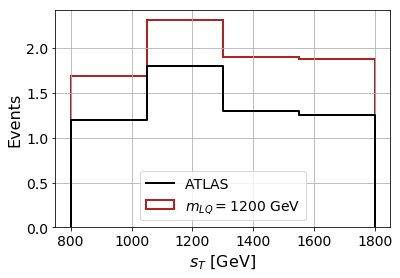

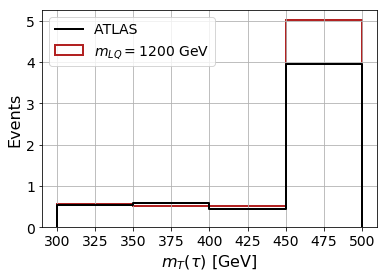

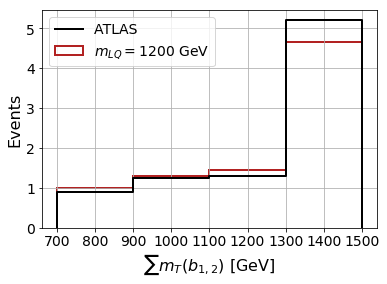

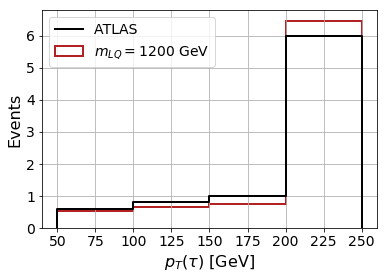

In [20]:
k_factor_1200 = sum(ATLAS_pT)/2 / LQup_1200GeV_Sexpected_ATLAS
factor_weight_1200 = (1./k_factor_1200)*LQup_1200GeV_evs_ATLAS/LQup_1200GeV_Sexpected_ATLAS


BGttstau_store_sT_cap_1200 = []
for i in range(len(BGttstau_store_sT)):
    if BGttstau_store_sT[i] > 1800:
        BGttstau_store_sT_cap_1200.append( 1800 )
    else:
        BGttstau_store_sT_cap_1200.append( BGttstau_store_sT[i] )
        
    
weights_sT_1200 = np.ones_like(BGttstau_store_sT_cap_1200)/factor_weight_1200
        
plt.hist(BGttstau_store_sT_cap_1200, weights=weights_sT_1200, bins=[800, 1050, 1300, 1550, 1800], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1200$ GeV')
plt.plot([800, 800, 1050, 1050, 1300, 1300, 1550, 1550, 1800, 1800], ATLAS_sT, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$s_T$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_mTtau_cap_1200 = []
for i in range(len(BGttstau_store_mTtau)):
    if BGttstau_store_mTtau[i] > 500:
        BGttstau_store_mTtau_cap_1200.append( 500 )
    else:
        BGttstau_store_mTtau_cap_1200.append( BGttstau_store_mTtau[i] )
        
    
weights_mTtau_1200 = np.ones_like(BGttstau_store_mTtau_cap_1200)/factor_weight_1200
        
plt.hist(BGttstau_store_mTtau_cap_1200, weights=weights_mTtau_1200, bins=[300, 350, 400, 450, 500], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1200$ GeV')
plt.plot([300, 300, 350, 350, 400, 400, 450, 450, 500, 500], ATLAS_mTtau, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$m_T(\tau)$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_mTb1b2_cap_1200 = []
for i in range(len(BGttstau_store_mTb1b2)):
    if BGttstau_store_mTb1b2[i] > 1500:
        BGttstau_store_mTb1b2_cap_1200.append( 1500 )
    else:
        BGttstau_store_mTb1b2_cap_1200.append( BGttstau_store_mTb1b2[i] )
        
    
weights_mTb1b2_1200 = np.ones_like(BGttstau_store_mTb1b2_cap_1200)/factor_weight_1200
        
plt.hist(BGttstau_store_mTb1b2_cap_1200, weights=weights_mTb1b2_1200, bins=[700, 900, 1100, 1300, 1500], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1200$ GeV')
plt.plot([700, 700, 900, 900, 1100, 1100, 1300, 1300, 1500, 1500], ATLAS_mTbb, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$\sum m_T(b_{1,2})$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_pTtau_cap_1200 = []
for i in range(len(BGttstau_store_pTtau)):
    if BGttstau_store_pTtau[i] > 250:
        BGttstau_store_pTtau_cap_1200.append( 250 )
    else:
        BGttstau_store_pTtau_cap_1200.append( BGttstau_store_pTtau[i] )
        
    
weights_pTtau_1200 = np.ones_like(BGttstau_store_pTtau_cap_1200)/factor_weight_1200
        
plt.hist(BGttstau_store_pTtau_cap_1200, weights=weights_pTtau_1200, bins=[50, 100, 150, 200, 250], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1200$ GeV')
plt.plot([50, 50, 100, 100, 150,150, 200, 200, 250, 250], ATLAS_pT, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T(\tau)$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  

In [21]:
print('global k-factor for all masses (taken from 1200GeV):', k_factor_1200)

('global k-factor for all masses (taken from 1200GeV):', 1.8877462860822058)


#### LQ-up-1400GeV

In [22]:
Folder = '/media/andres/Elements/Leptoquarks/signals/LQup-1400GeV/Auto_Results_LHCO/'

LQup_1400GeV_cross =  0.000264
LQup_1400GeV_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQup_1400GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQup_1400GeV_evs = len(ev)
print('# events that pass the cuts: ', LQup_1400GeV_evs)

/home/andres/anaconda3/envs/py2/lib/python2.7/site-packages/LHCO_reader/LHCO_reader.py:1484: UserWarning: Adding empty event
  warnings.warn("Adding empty event")


('# events that pass the cuts: ', 58769)


In [23]:
cross = LQup_1400GeV_cross*1000
aceptancia = LQup_1400GeV_evs/(50000.*LQup_1400GeV_runs)
luminosidad = 139

LQup_1400GeV_fidcross = cross * aceptancia
LQup_1400GeV_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', LQup_1400GeV_fidcross)
print('S_expected: ', LQup_1400GeV_Sexpected)

('fiducial cross section: ', 0.0124120128)
('S_expected: ', 1.7252697792)


In [24]:
Folder = '/media/andres/Elements/Leptoquarks/signals/LQup-1400GeV/Auto_Results_LHCO/'

LQup_1400GeV_cross = 0.000264
LQup_1400GeV_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQup_1400GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQup_1400GeV_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', LQup_1400GeV_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 40170)


In [25]:
cross = LQup_1400GeV_cross*1000
aceptancia = LQup_1400GeV_evs_ATLAS/(50000.*LQup_1400GeV_runs)
luminosidad = 139

LQup_1400GeV_fidcross_ATLAS = cross * aceptancia
LQup_1400GeV_Sexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', LQup_1400GeV_fidcross_ATLAS)
print('S_expected: ', LQup_1400GeV_Sexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.008483904)
('S_expected: ', 1.1792626560000001)


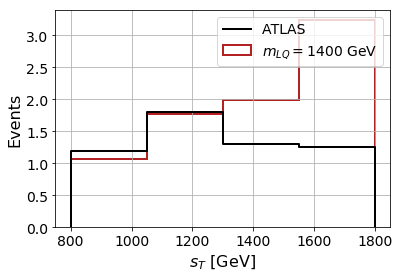

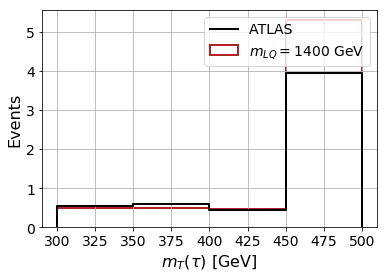

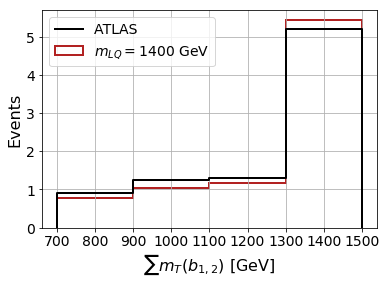

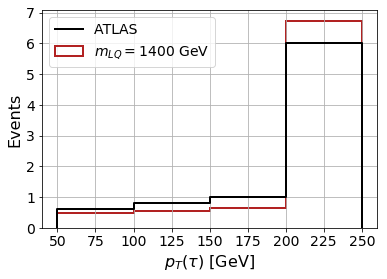

In [26]:
k_factor_1400 = sum(ATLAS_pT)/2 / LQup_1400GeV_Sexpected_ATLAS
factor_weight_1400 = (1./k_factor_1400)*LQup_1400GeV_evs_ATLAS/LQup_1400GeV_Sexpected_ATLAS


BGttstau_store_sT_cap_1400 = []
for i in range(len(BGttstau_store_sT)):
    if BGttstau_store_sT[i] > 1800:
        BGttstau_store_sT_cap_1400.append( 1800 )
    else:
        BGttstau_store_sT_cap_1400.append( BGttstau_store_sT[i] )
        
    
weights_sT_1400 = np.ones_like(BGttstau_store_sT_cap_1400)/factor_weight_1400
        
plt.hist(BGttstau_store_sT_cap_1400, weights=weights_sT_1400, bins=[800, 1050, 1300, 1550, 1800], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1400$ GeV')
plt.plot([800, 800, 1050, 1050, 1300, 1300, 1550, 1550, 1800, 1800], ATLAS_sT, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$s_T$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_mTtau_cap_1400 = []
for i in range(len(BGttstau_store_mTtau)):
    if BGttstau_store_mTtau[i] > 500:
        BGttstau_store_mTtau_cap_1400.append( 500 )
    else:
        BGttstau_store_mTtau_cap_1400.append( BGttstau_store_mTtau[i] )
        
    
weights_mTtau_1400 = np.ones_like(BGttstau_store_mTtau_cap_1400)/factor_weight_1400
        
plt.hist(BGttstau_store_mTtau_cap_1400, weights=weights_mTtau_1400, bins=[300, 350, 400, 450, 500], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1400$ GeV')
plt.plot([300, 300, 350, 350, 400, 400, 450, 450, 500, 500], ATLAS_mTtau, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$m_T(\tau)$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_mTb1b2_cap_1400 = []
for i in range(len(BGttstau_store_mTb1b2)):
    if BGttstau_store_mTb1b2[i] > 1500:
        BGttstau_store_mTb1b2_cap_1400.append( 1500 )
    else:
        BGttstau_store_mTb1b2_cap_1400.append( BGttstau_store_mTb1b2[i] )
        
    
weights_mTb1b2_1400 = np.ones_like(BGttstau_store_mTb1b2_cap_1400)/factor_weight_1400
        
plt.hist(BGttstau_store_mTb1b2_cap_1400, weights=weights_mTb1b2_1400, bins=[700, 900, 1100, 1300, 1500], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1400$ GeV')
plt.plot([700, 700, 900, 900, 1100, 1100, 1300, 1300, 1500, 1500], ATLAS_mTbb, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$\sum m_T(b_{1,2})$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_pTtau_cap_1400 = []
for i in range(len(BGttstau_store_pTtau)):
    if BGttstau_store_pTtau[i] > 250:
        BGttstau_store_pTtau_cap_1400.append( 250 )
    else:
        BGttstau_store_pTtau_cap_1400.append( BGttstau_store_pTtau[i] )
        
    
weights_pTtau_1400 = np.ones_like(BGttstau_store_pTtau_cap_1400)/factor_weight_1400
        
plt.hist(BGttstau_store_pTtau_cap_1400, weights=weights_pTtau_1400, bins=[50, 100, 150, 200, 250], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1400$ GeV')
plt.plot([50, 50, 100, 100, 150,150, 200, 200, 250, 250], ATLAS_pT, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T(\tau)$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  

#### LQ-up-1600GeV

In [27]:
Folder = '/media/andres/Elements/Leptoquarks/signals/LQup-1600GeV/Auto_Results_LHCO/'

LQup_1600GeV_cross = 0.0000802
LQup_1600GeV_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQup_1600GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQup_1600GeV_evs = len(ev)
print('# events that pass the cuts: ', LQup_1600GeV_evs)

('# events that pass the cuts: ', 60653)


In [28]:
cross = LQup_1600GeV_cross*1000
aceptancia = LQup_1600GeV_evs/(50000.*LQup_1600GeV_runs)
luminosidad = 139

LQup_1600GeV_fidcross = cross * aceptancia
LQup_1600GeV_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', LQup_1600GeV_fidcross)
print('S_expected: ', LQup_1600GeV_Sexpected)

('fiducial cross section: ', 0.0038914964799999997)
('S_expected: ', 0.54091801072)


In [29]:
Folder = '/media/andres/Elements/Leptoquarks/signals/LQup-1600GeV/Auto_Results_LHCO/'

LQup_1600GeV_cross = 0.0000802
LQup_1600GeV_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQup_1600GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(iev)+".lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQup_1600GeV_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', LQup_1600GeV_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 43358)


In [30]:
cross = LQup_1600GeV_cross*1000
aceptancia = LQup_1600GeV_evs_ATLAS/(50000.*LQup_1600GeV_runs)
luminosidad = 139

LQup_1600GeV_fidcross_ATLAS = cross * aceptancia
LQup_1600GeV_Sexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', LQup_1600GeV_fidcross_ATLAS)
print('S_expected: ', LQup_1600GeV_Sexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.0027818492799999996)
('S_expected: ', 0.38667704991999996)


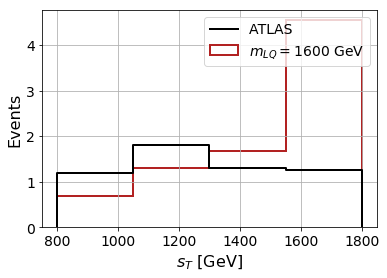

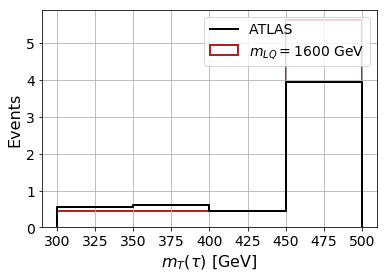

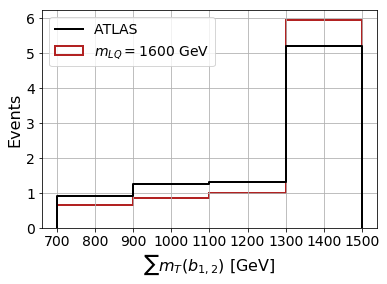

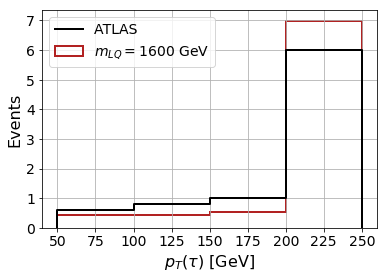

In [31]:
k_factor_1600 = sum(ATLAS_pT)/2 / LQup_1600GeV_Sexpected_ATLAS
factor_weight_1600 = (1./k_factor_1600)*LQup_1600GeV_evs_ATLAS/LQup_1600GeV_Sexpected_ATLAS


BGttstau_store_sT_cap_1600 = []
for i in range(len(BGttstau_store_sT)):
    if BGttstau_store_sT[i] > 1800:
        BGttstau_store_sT_cap_1600.append( 1800 )
    else:
        BGttstau_store_sT_cap_1600.append( BGttstau_store_sT[i] )
        
    
weights_sT_1600 = np.ones_like(BGttstau_store_sT_cap_1600)/factor_weight_1600
        
plt.hist(BGttstau_store_sT_cap_1600, weights=weights_sT_1600, bins=[800, 1050, 1300, 1550, 1800], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1600$ GeV')
plt.plot([800, 800, 1050, 1050, 1300, 1300, 1550, 1550, 1800, 1800], ATLAS_sT, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$s_T$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_mTtau_cap_1600 = []
for i in range(len(BGttstau_store_mTtau)):
    if BGttstau_store_mTtau[i] > 500:
        BGttstau_store_mTtau_cap_1600.append( 500 )
    else:
        BGttstau_store_mTtau_cap_1600.append( BGttstau_store_mTtau[i] )
        
    
weights_mTtau_1600 = np.ones_like(BGttstau_store_mTtau_cap_1600)/factor_weight_1600
        
plt.hist(BGttstau_store_mTtau_cap_1600, weights=weights_mTtau_1600, bins=[300, 350, 400, 450, 500], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1600$ GeV')
plt.plot([300, 300, 350, 350, 400, 400, 450, 450, 500, 500], ATLAS_mTtau, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$m_T(\tau)$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_mTb1b2_cap_1600 = []
for i in range(len(BGttstau_store_mTb1b2)):
    if BGttstau_store_mTb1b2[i] > 1500:
        BGttstau_store_mTb1b2_cap_1600.append( 1500 )
    else:
        BGttstau_store_mTb1b2_cap_1600.append( BGttstau_store_mTb1b2[i] )
        
    
weights_mTb1b2_1600 = np.ones_like(BGttstau_store_mTb1b2_cap_1600)/factor_weight_1600
        
plt.hist(BGttstau_store_mTb1b2_cap_1600, weights=weights_mTb1b2_1600, bins=[700, 900, 1100, 1300, 1500], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1600$ GeV')
plt.plot([700, 700, 900, 900, 1100, 1100, 1300, 1300, 1500, 1500], ATLAS_mTbb, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$\sum m_T(b_{1,2})$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_pTtau_cap_1600 = []
for i in range(len(BGttstau_store_pTtau)):
    if BGttstau_store_pTtau[i] > 250:
        BGttstau_store_pTtau_cap_1600.append( 250 )
    else:
        BGttstau_store_pTtau_cap_1600.append( BGttstau_store_pTtau[i] )
        
    
weights_pTtau_1600 = np.ones_like(BGttstau_store_pTtau_cap_1600)/factor_weight_1600
        
plt.hist(BGttstau_store_pTtau_cap_1600, weights=weights_pTtau_1600, bins=[50, 100, 150, 200, 250], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1600$ GeV')
plt.plot([50, 50, 100, 100, 150,150, 200, 200, 250, 250], ATLAS_pT, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T(\tau)$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  

#### LQ-up-1800GeV

In [33]:
Folder = '/media/andres/Elements/Leptoquarks/signals/LQup-1800GeV/'

LQup_1800GeV_cross = 2.535349e-05
LQup_1800GeV_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQup_1800GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+'lqu18-'+str(iev)+"/tag_1_delphes_events.lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    #if mTtau > 150:
                    if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        #if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQup_1800GeV_evs = len(ev)
print('# events that pass the cuts: ', LQup_1800GeV_evs)

('# events that pass the cuts: ', 56076)


In [34]:
cross = LQup_1800GeV_cross*1000
aceptancia = LQup_1800GeV_evs/(50000.*LQup_1800GeV_runs)
luminosidad = 139

LQup_1800GeV_fidcross = cross * aceptancia
LQup_1800GeV_Sexpected = cross * aceptancia * luminosidad

print('fiducial cross section: ', LQup_1800GeV_fidcross)
print('S_expected: ', LQup_1800GeV_Sexpected)

('fiducial cross section: ', 0.001137377844192)
('S_expected: ', 0.15809552034268798)


In [35]:
Folder = '/media/andres/Elements/Leptoquarks/signals/LQup-1800GeV/'

LQup_1800GeV_cross = 2.535349e-05
LQup_1800GeV_runs = 25

ev = []

BGttstau_store_pTtau = []
BGttstau_store_sT = []
BGttstau_store_mTtau = []
BGttstau_store_mTb1b2 = []

for iev in range(1,LQup_1800GeV_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+'lqu18-'+str(iev)+"/tag_1_delphes_events.lhco")

    for i in range(len(inputevents)):

        num_es = 0
        num_mus = 0
        num_taus = 0
        num_jets = 0
        num_btag = 0
        index_tau = 0
        sT = 0
        mTtau = 0
        mTb1b2 = 0

        # to be considered e
        if inputevents[i].number()["electron"] > 0:
            for ll in range(inputevents[i].number()["electron"]):
                if inputevents[i]["electron"][ll]["PT"] > 10 and -2.47 < inputevents[i]["electron"][ll]["eta"] < 2.47:
                    num_es += 1
                    
        # to be considered mu
        if inputevents[i].number()["muon"] > 0:
            for ll in range(inputevents[i].number()["muon"]):
                if inputevents[i]["muon"][ll]["PT"] > 10 and -2.7 < inputevents[i]["muon"][ll]["eta"] < 2.7:
                    num_mus += 1
                    
        # to be considered tau
        if inputevents[i].number()["tau"] > 0:
            for ll in range(inputevents[i].number()["tau"]):
                if inputevents[i]["tau"][ll]["PT"] > 20 and (-2.5 < inputevents[i]["tau"][ll]["eta"] < -1.52 or -1.37 < inputevents[i]["tau"][ll]["eta"] < 1.37 or 1.52 < inputevents[i]["tau"][ll]["eta"] < 2.5):
                    num_taus += 1
                    index_tau = ll
                    
        # conditions A: 0 electrons, 0 muons, 1 tau and also EXTRA: require that the id tau has pT > 50 GeV
        if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 50:
        #if num_es == 0 and num_mus == 0 and num_taus == 1 and inputevents[i]["tau"][index_tau]["PT"] > 20:

            # MET
            if inputevents[i]["MET"][0]["PT"] > 280:

                # at least 2 jets
                if inputevents[i].number()["jet"] > 1:
                    
                    # transverse mass of leading tau (that was id as tau)
                    mTtau = (2 * inputevents[i]["tau"][index_tau]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["tau"][index_tau]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5

                    # condition B: mTtau > 150 GeV
                    if mTtau > 150:
                    #if mTtau > 0:
                        
                        # compute sT using the tau that was id as tau
                        sT = inputevents[i]["tau"][index_tau]["PT"]
                        
                        # add to sT the 2 leading jets (id as jets)
                        for k in range(inputevents[i].number()["jet"]):
                            if -2.8 < inputevents[i]["jet"][k]["eta"] < 2.8 and inputevents[i]["jet"][k]["PT"] > 20:
                                num_jets += 1
                                if num_jets < 3:
                                    sT = sT + inputevents[i]["jet"][k]["PT"]

                        # check # of b-jets (id as b-tag, tighter request than jets)
                        for j in range(inputevents[i].number()["jet"]):
                            if inputevents[i]["jet"][j]["btag"] == 1 and inputevents[i]["jet"][j]["PT"] > 20 and -2.5 < inputevents[i]["jet"][j]["eta"] < 2.5:
                                num_btag += 1
                                if num_btag < 3:
                                    mTb1b2 += (2 * inputevents[i]["jet"][j]["PT"] * inputevents[i]["MET"][0]["PT"] * (1.0- np.cos(inputevents[i]["jet"][j]["phi"]-inputevents[i]["MET"][0]["phi"])) )**0.5



                        # conditions C: 2 or more jets, 2 or more b-jets, sT > 600 GeV and mTb1b2 > 700 GeV
                        if num_jets > 1 and num_btag > 1 and sT > 600 and mTb1b2 > 700:
                        #if num_jets > 1 and num_btag > 1 and sT > 0 and mTb1b2 > 0:
                            #print(mTb1b2)
                            #print(i)
                            #break

                            ev.append(i)

                            BGttstau_store_pTtau.append(inputevents[i]["tau"][0]["PT"])
                            BGttstau_store_sT.append(sT)
                            BGttstau_store_mTtau.append(mTtau)
                            BGttstau_store_mTb1b2.append(mTb1b2)

LQup_1800GeV_evs_ATLAS = len(ev)

print('ATLAS CUTS')
print('# events that pass the cuts: ', LQup_1800GeV_evs_ATLAS)

ATLAS CUTS
('# events that pass the cuts: ', 41287)


In [36]:
cross = LQup_1800GeV_cross*1000
aceptancia = LQup_1800GeV_evs_ATLAS/(50000.*LQup_1800GeV_runs)
luminosidad = 139

LQup_1800GeV_fidcross_ATLAS = cross * aceptancia
LQup_1800GeV_Sexpected_ATLAS = cross * aceptancia * luminosidad

print('ATLAS CUTS')
print('fiducial cross section: ', LQup_1800GeV_fidcross_ATLAS)
print('S_expected: ', LQup_1800GeV_Sexpected_ATLAS)

ATLAS CUTS
('fiducial cross section: ', 0.0008374156333039999)
('S_expected: ', 0.11640077302925599)


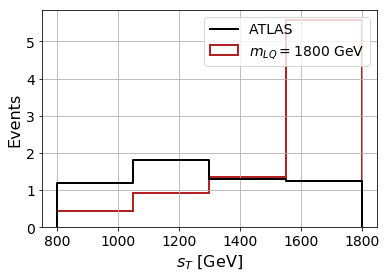

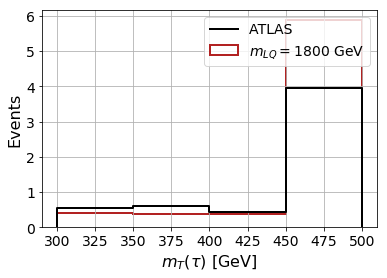

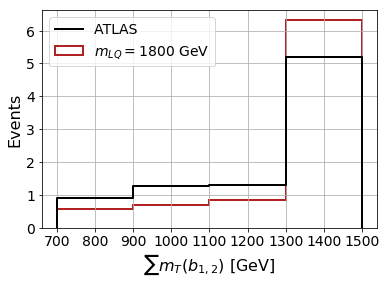

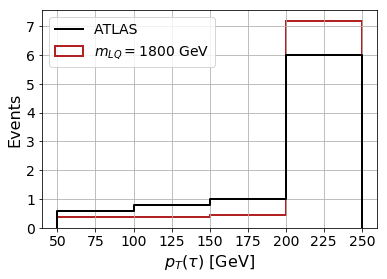

In [37]:
k_factor_1800 = sum(ATLAS_pT)/2 / LQup_1800GeV_Sexpected_ATLAS
factor_weight_1800 = (1./k_factor_1800)*LQup_1800GeV_evs_ATLAS/LQup_1800GeV_Sexpected_ATLAS


BGttstau_store_sT_cap_1800 = []
for i in range(len(BGttstau_store_sT)):
    if BGttstau_store_sT[i] > 1800:
        BGttstau_store_sT_cap_1800.append( 1800 )
    else:
        BGttstau_store_sT_cap_1800.append( BGttstau_store_sT[i] )
        
    
weights_sT_1800 = np.ones_like(BGttstau_store_sT_cap_1800)/factor_weight_1800
        
plt.hist(BGttstau_store_sT_cap_1800, weights=weights_sT_1800, bins=[800, 1050, 1300, 1550, 1800], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1800$ GeV')
plt.plot([800, 800, 1050, 1050, 1300, 1300, 1550, 1550, 1800, 1800], ATLAS_sT, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$s_T$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_mTtau_cap_1800 = []
for i in range(len(BGttstau_store_mTtau)):
    if BGttstau_store_mTtau[i] > 500:
        BGttstau_store_mTtau_cap_1800.append( 500 )
    else:
        BGttstau_store_mTtau_cap_1800.append( BGttstau_store_mTtau[i] )
        
    
weights_mTtau_1800 = np.ones_like(BGttstau_store_mTtau_cap_1800)/factor_weight_1800
        
plt.hist(BGttstau_store_mTtau_cap_1800, weights=weights_mTtau_1800, bins=[300, 350, 400, 450, 500], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1800$ GeV')
plt.plot([300, 300, 350, 350, 400, 400, 450, 450, 500, 500], ATLAS_mTtau, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$m_T(\tau)$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_mTb1b2_cap_1800 = []
for i in range(len(BGttstau_store_mTb1b2)):
    if BGttstau_store_mTb1b2[i] > 1500:
        BGttstau_store_mTb1b2_cap_1800.append( 1500 )
    else:
        BGttstau_store_mTb1b2_cap_1800.append( BGttstau_store_mTb1b2[i] )
        
    
weights_mTb1b2_1800 = np.ones_like(BGttstau_store_mTb1b2_cap_1800)/factor_weight_1800
        
plt.hist(BGttstau_store_mTb1b2_cap_1800, weights=weights_mTb1b2_1800, bins=[700, 900, 1100, 1300, 1500], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1800$ GeV')
plt.plot([700, 700, 900, 900, 1100, 1100, 1300, 1300, 1500, 1500], ATLAS_mTbb, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$\sum m_T(b_{1,2})$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  



BGttstau_store_pTtau_cap_1800 = []
for i in range(len(BGttstau_store_pTtau)):
    if BGttstau_store_pTtau[i] > 250:
        BGttstau_store_pTtau_cap_1800.append( 250 )
    else:
        BGttstau_store_pTtau_cap_1800.append( BGttstau_store_pTtau[i] )
        
    
weights_pTtau_1800 = np.ones_like(BGttstau_store_pTtau_cap_1800)/factor_weight_1800
        
plt.hist(BGttstau_store_pTtau_cap_1800, weights=weights_pTtau_1800, bins=[50, 100, 150, 200, 250], histtype='step', color='firebrick', linewidth=2, label=r'$m_{LQ}=1800$ GeV')
plt.plot([50, 50, 100, 100, 150,150, 200, 200, 250, 250], ATLAS_pT, color='black', linewidth=2, label=r'ATLAS')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$p_T(\tau)$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()  

### Expected number of events after cuts

In [38]:
mass = [800,1000,1200,1400,1600,1800]

S_exp_loose = [102.64388737032002,26.204897493599997,6.884417020000001,1.7252697792,0.54091801072,0.15809552034268798]
S_exp_ATLAS = [49.14829060272,15.243772603200002,4.4497505104,1.179262656,0.38667704991999996,0.11640077302925599]

S_k_factor = [1.8877462860822058] # LQ up

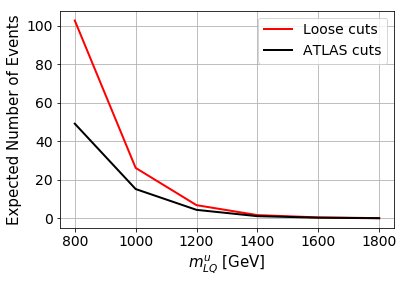

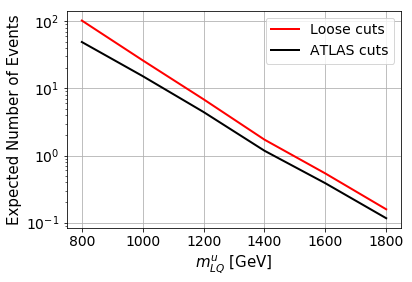

In [42]:
plt.plot(mass, S_exp_loose, color='red', linewidth=2, label=r'Loose cuts')
plt.plot(mass, S_exp_ATLAS, color='black', linewidth=2, label=r'ATLAS cuts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.yscale('log')
plt.xlabel(r"$m_{LQ}^u$ [GeV]",fontsize=15)
plt.ylabel('Expected Number of Events', fontsize = 15)
plt.grid()
plt.legend(fontsize=14)
plt.show() 

plt.plot(mass, S_exp_loose, color='red', linewidth=2, label=r'Loose cuts')
plt.plot(mass, S_exp_ATLAS, color='black', linewidth=2, label=r'ATLAS cuts')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xlabel(r"$m_{LQ}^u$ [GeV]",fontsize=15)
plt.ylabel('Expected Number of Events', fontsize = 15)
plt.grid()
plt.legend(fontsize=14)
plt.savefig('LQup_expected_events.pdf', bbox_inches='tight')
plt.show() 